Customer churn or customer turnover, refers to the phenomenon where customers/subscribers cease doing business with a company or stop using its services. 
In other words, customer churn occurs when customers, who were previously engaged with a business, 
discontinue their relationship with that business within a specified period.
Churn Rate Calculation:
The churn rate is often calculated as the number of customers lost during a specific period divided by
the total number of customers at the beginning of that period.
Churn Rate= (Number of Customers Lost / Total Number of Customers at the Start) × 100%

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents
#Describing some features of the Telco Customer dataset
- Dependents - Whether the customer has dependents (Yes, No)
- tenure - Number of months the customer has stayed with the company
- InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - Whether the customer has online security (Yes, No, No internet service)
- OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
- Contract - Indicates the type of the contract (Month-to-month, One year, Two year)
- PaperlessBilling - Whether the customer has paperless billing (Yes, No)
- PaymentMethod - Indicates the payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - Indicates the current monthly subscription cost of the customer
- TotalCharges - Indicates the total charges paid by the customer so far
- Churn - Indicates whether the customer churned

QUESTIONS TO ANSWER:
- What are the customers' characteristics and tendencies?
- What does the customer like or dislike?
- Actual reasons for leaving?
- What would it take to get customers to stay?

In [1]:
# Importing required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
telco_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Describes the features of the dataset
telco_df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [4]:
# Check basic information about the dataset
telco_df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [5]:
#This data contains 7043 entries and 21 features
telco_df.shape

(7043, 21)

In [6]:
telco_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- 3 numerical variables: SeniorCitizen, tenure, MonthlyCharges, 
- 13 categorical features :gender,Partner, Dependents,PhoneService,MultiplrLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
- 5 strings features :customerID, Contract, InternetService,PaymentMethod,TotalCharges

In [7]:
#Total Charges should be numeric amount.
#converting it to numerical data type
telco_df.TotalCharges = pd.to_numeric(telco_df.TotalCharges, errors='coerce')
telco_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
telco_df.loc[telco_df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Out of our 7043 rows, just 11 rows have null values, i.e, 0.156% of entries have null values. 
Our questions are not tied to the specific customers, but to get a statistical overview. So we can 
drop all null entries.

In [9]:
#Dropping null entries
telco_df.dropna(how='any', inplace=True)

telco_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# Checking for duplicated values
telco_df.duplicated().sum()

0

In [11]:
#We also have no use for customerID nor knowing how many months they stayed, so we drop those too
telco_df.drop(columns='customerID',inplace=True)
telco_df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [12]:
# List of columns with 'Yes' and 'No' categories
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# Truncate everything after the word "No" in the specified columns
telco_df[yes_no_cols] = telco_df[yes_no_cols].apply(lambda x: x.str.split("No").str[0])

# Convert the truncated values to numeric (1 for non-empty strings, 0 for empty strings)
telco_df[yes_no_cols] = telco_df[yes_no_cols].applymap(lambda x: 1 if x else 0)


VISUALIZATION

C:\Users\Geraldine\AppData\Local\Temp\ipykernel_36832\3116786996.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = telco_df.corr()


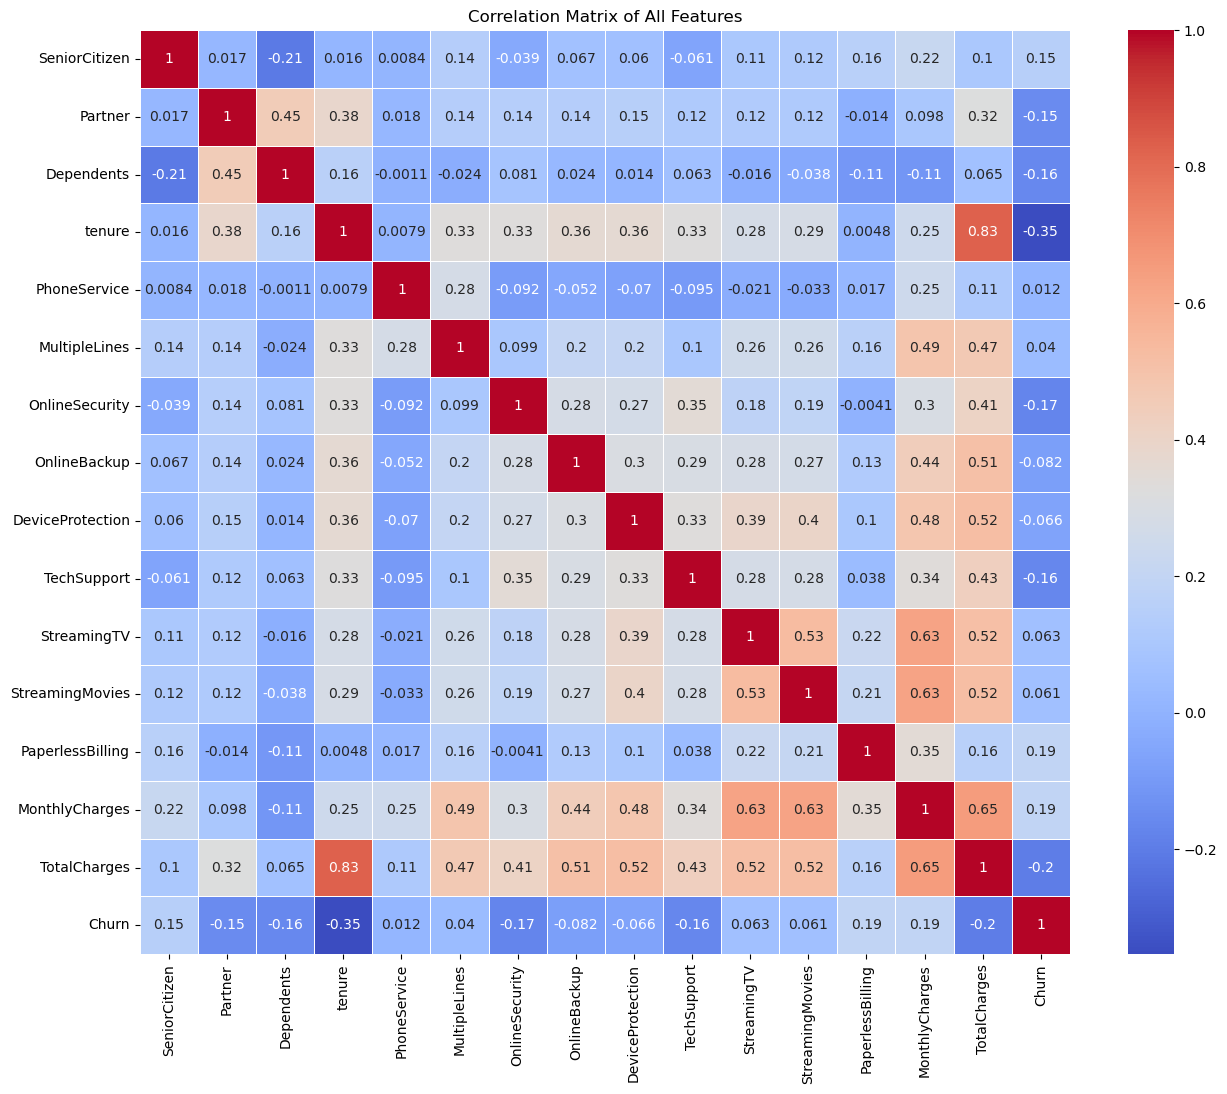

In [13]:
# Computing the correlation matrix
correlation_matrix = telco_df.corr()
# Setting up the matplotlib figure
plt.figure(figsize=(15, 12))
# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# Show the plot
plt.title('Correlation Matrix of All Features')
plt.show()


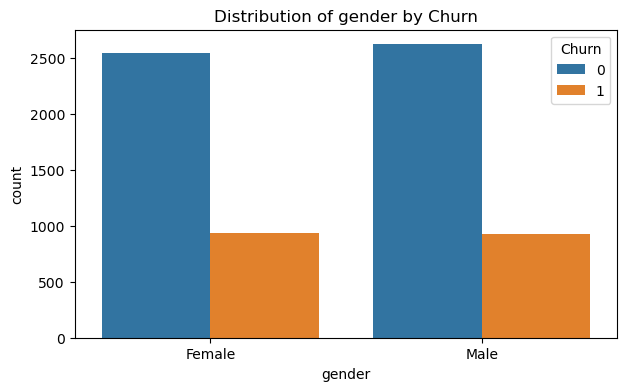

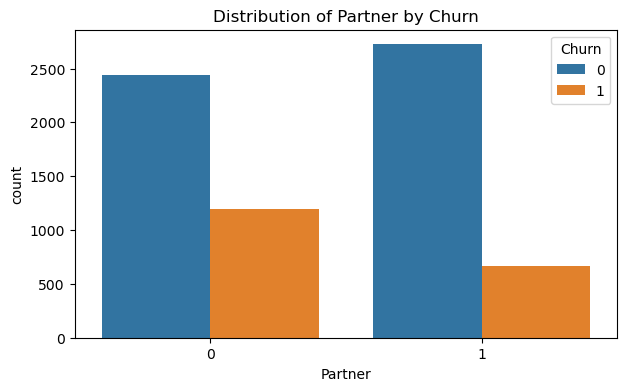

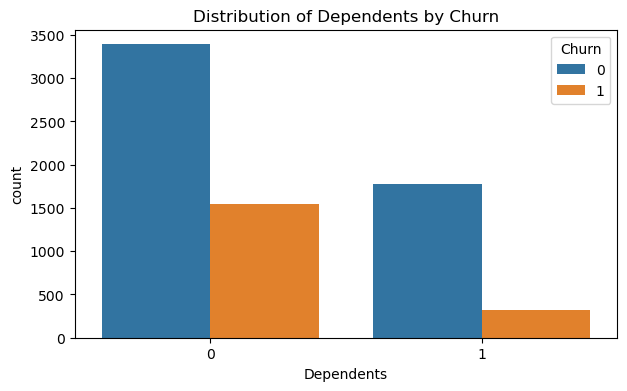

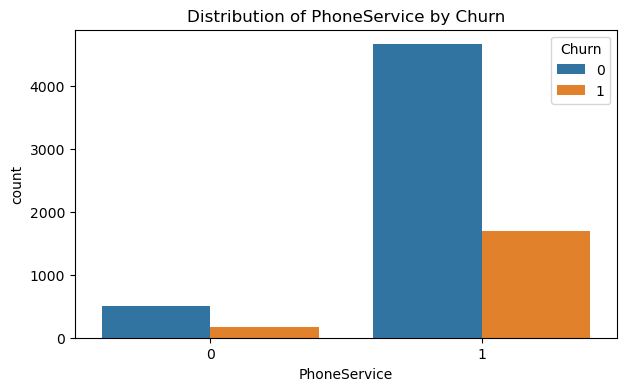

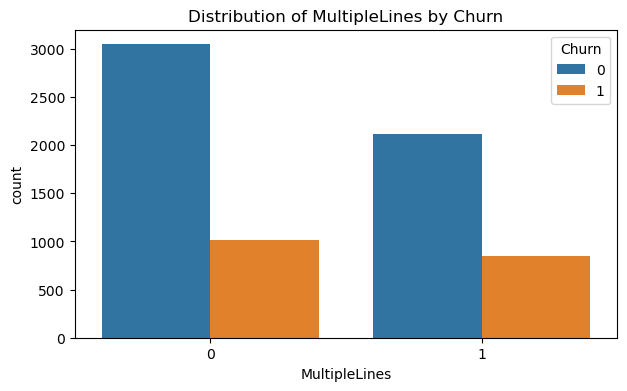

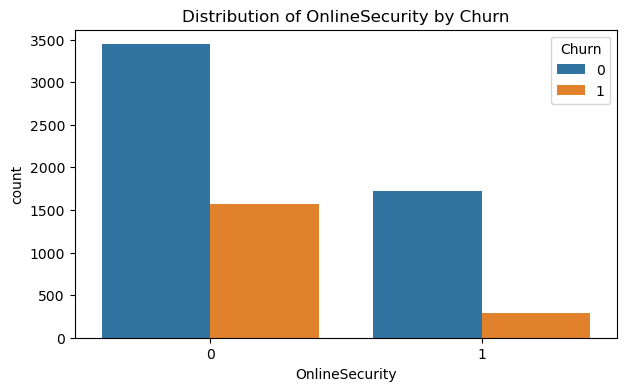

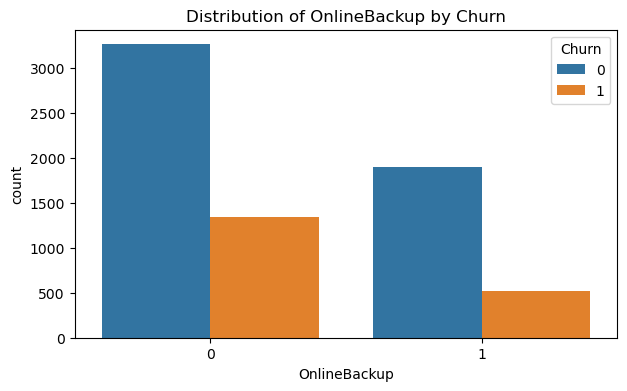

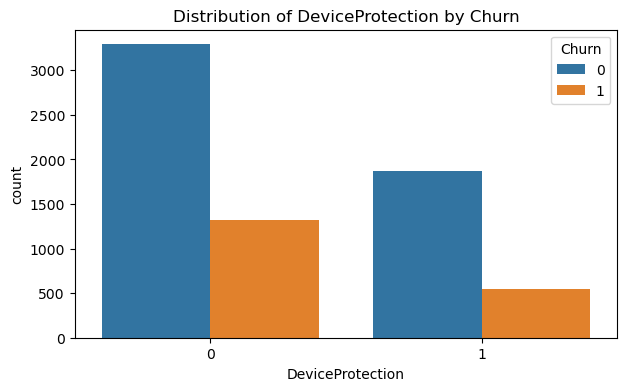

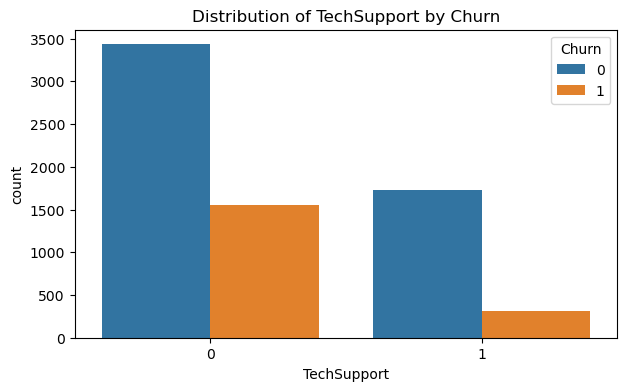

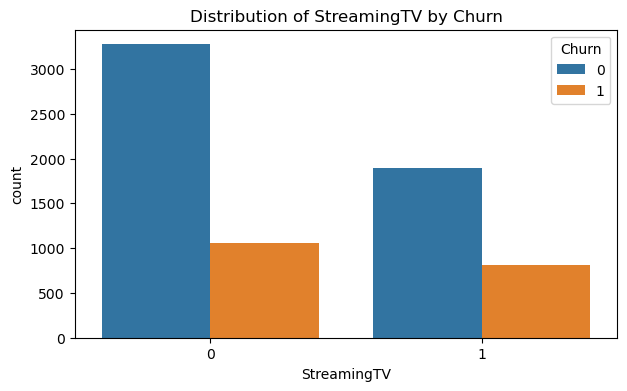

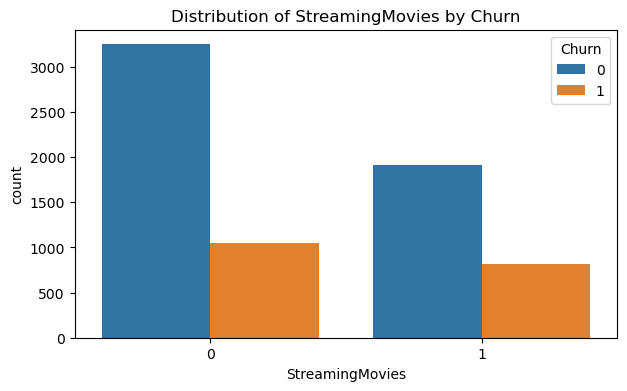

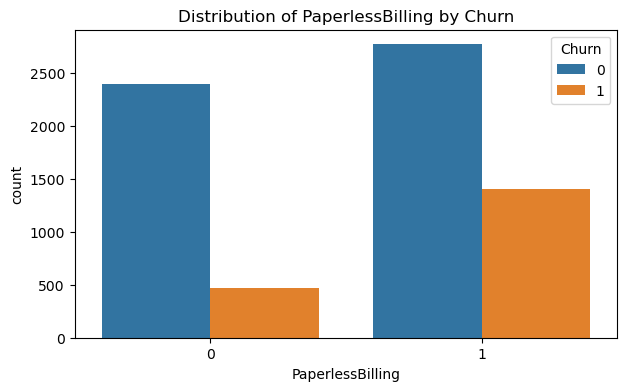

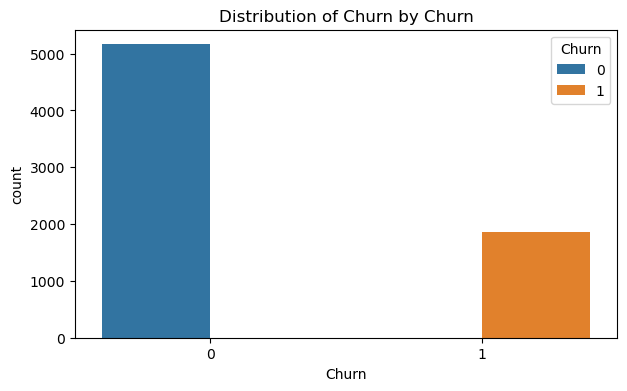

In [14]:
#Working with 'Yes' and 'No' categories, turning them into 1 and 0 respectively

#Visualize the Distribution of Categorical Features
# List of categorical features
categorical_features = ['gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                         'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# Visualize the distribution of each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=feature, data=telco_df, hue='Churn')
    plt.title(f'Distribution of {feature} by Churn')
    plt.show()


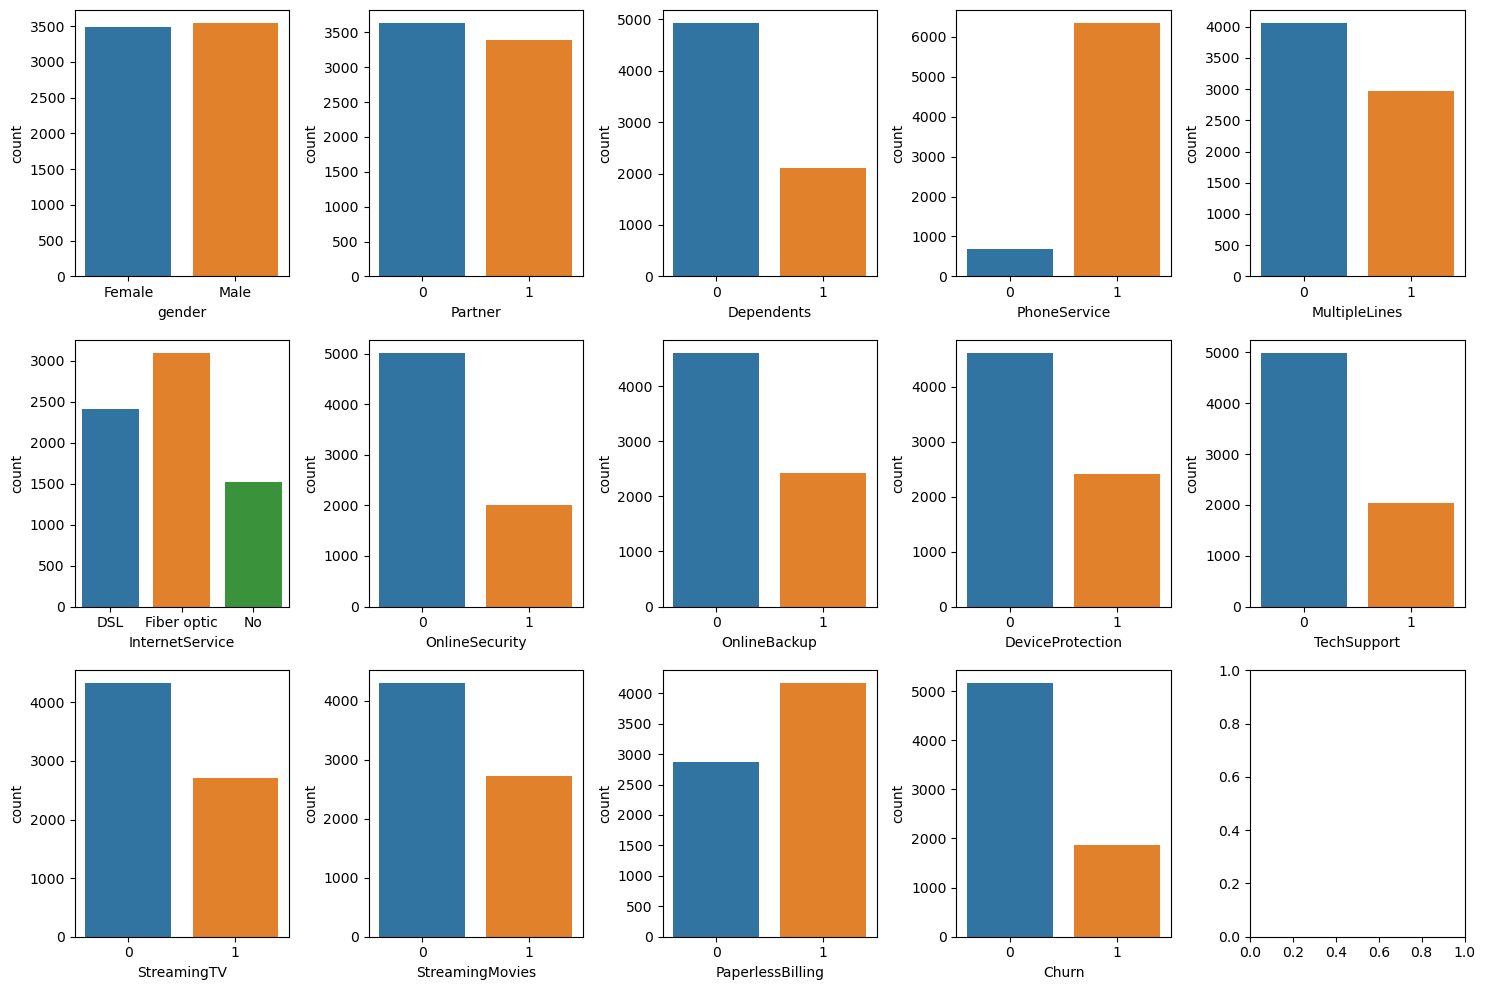

In [15]:
# Visualize distribution of categorical variables
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))

category_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for i, column in enumerate(category_cols):
    sns.countplot(x=column, data=telco_df, ax=axes[i // 5, i % 5])

plt.tight_layout()
plt.show()


These plots answer demographics characteristics like Gender,Senior Citizen,Partner&dependents 
distributions, as well as customers tendencies like Contract Type,Internet Service,Additional Services
distributions and Churn Distribution by Gender,contract type and internet service distributions.


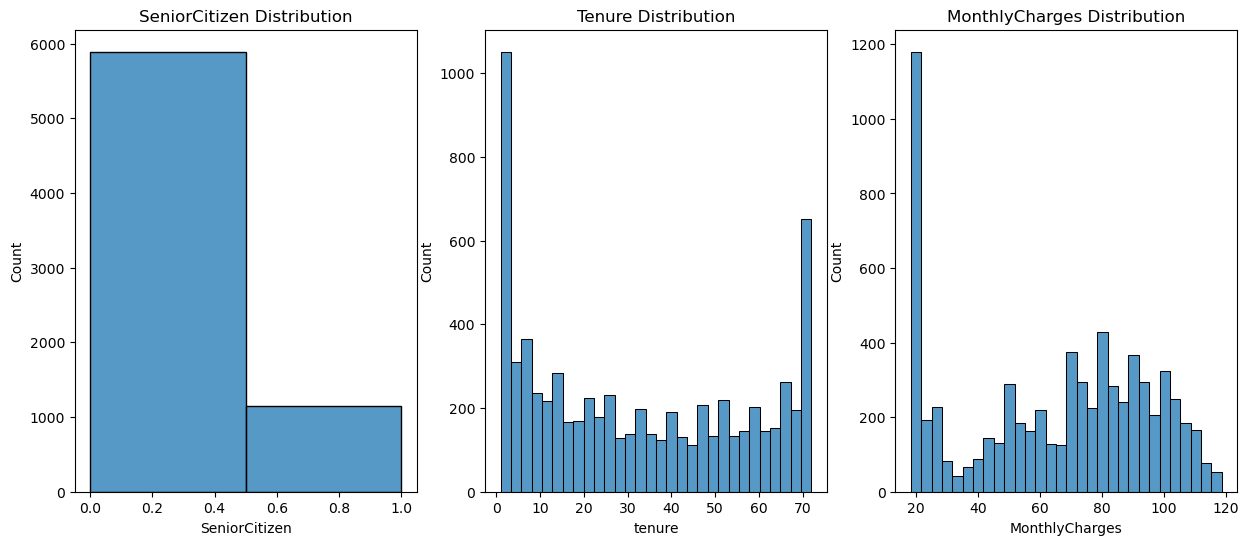

In [16]:
# Visualize distribution of numerical columns
# Visualize distribution of numerical variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

sns.histplot(telco_df['SeniorCitizen'], bins=2, kde=False, ax=axes[0])
axes[0].set_title('SeniorCitizen Distribution')

sns.histplot(telco_df['tenure'], bins=30, kde=False, ax=axes[1])
axes[1].set_title('Tenure Distribution')

sns.histplot(telco_df['MonthlyCharges'], bins=30, kde=False, ax=axes[2])
axes[2].set_title('MonthlyCharges Distribution')
plt.show()


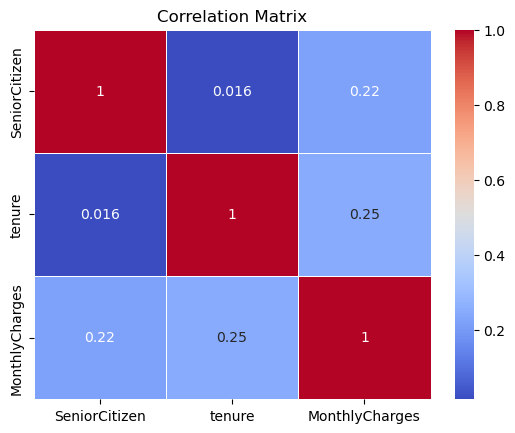

In [17]:
# Explore correlations between numerical variables
correlation_matrix = telco_df[['SeniorCitizen', 'tenure', 'MonthlyCharges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


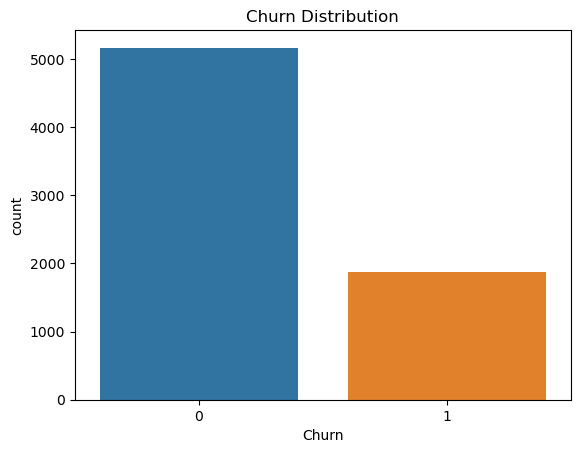

In [18]:
# Explore churn rate
sns.countplot(x='Churn', data=telco_df)
plt.title('Churn Distribution')
plt.show()


The ratio of customers who churned to those who stayes is 2:5, meaning 40% of customers churned and 
60% stayed or did not churn.

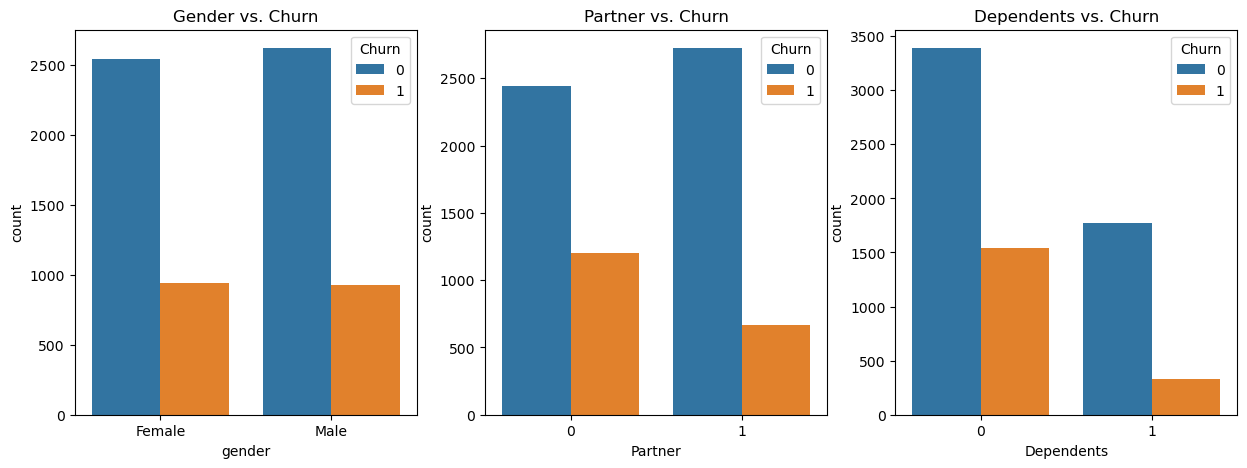

In [19]:
# Explore customer demographics
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.countplot(x='gender', hue='Churn', data=telco_df, ax=axes[0])
axes[0].set_title('Gender vs. Churn')

sns.countplot(x='Partner', hue='Churn', data=telco_df, ax=axes[1])
axes[1].set_title('Partner vs. Churn')

sns.countplot(x='Dependents', hue='Churn', data=telco_df, ax=axes[2])
axes[2].set_title('Dependents vs. Churn')
plt.show()


According to the visuals;
- More male customers over 2500 didn't churned compared to female customers.
- Partners of the company churned less compared to non-partners.
- Customers with less dependents churned more than those with more dependents.

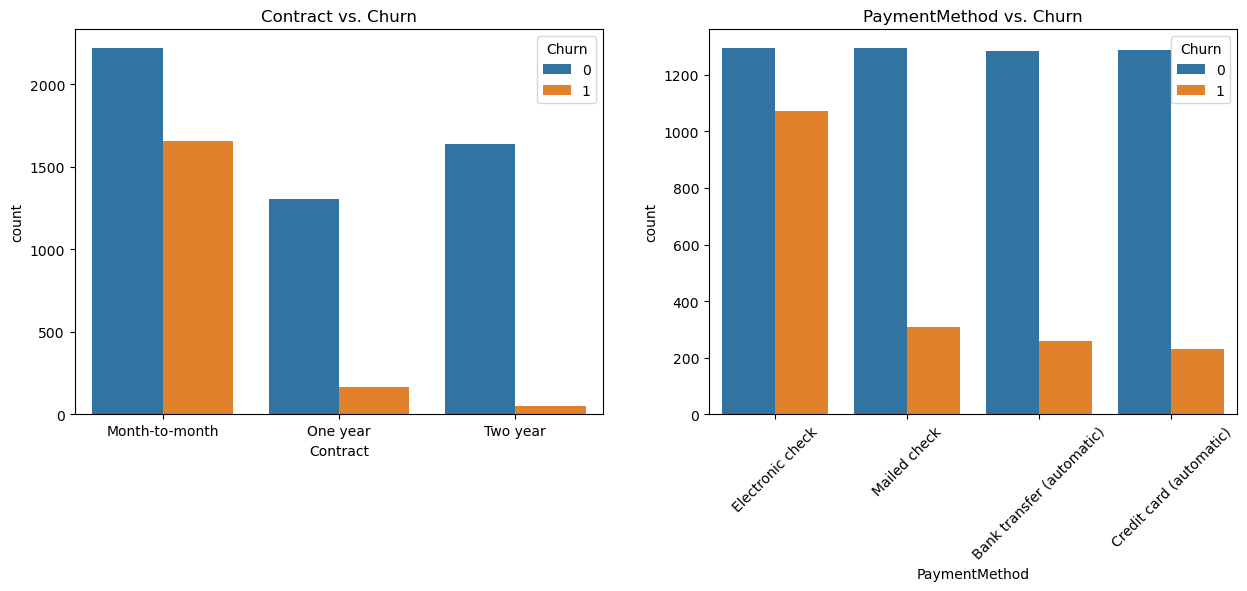

In [20]:
# Explore contract and payment method
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.countplot(x='Contract', hue='Churn', data=telco_df, ax=axes[0])
axes[0].set_title('Contract vs. Churn')

sns.countplot(x='PaymentMethod', hue='Churn', data=telco_df, ax=axes[1])
axes[1].set_title('PaymentMethod vs. Churn')
axes[1].tick_params(axis='x', rotation=45)
plt.show()


According to the visuals;
- Customers contracts that churned most are those with a monthly contract over 2000, but they also have the 
least amout of customers who churned.Those with 1 year contract have less churners than churners and
customers with 2 year contracts churned least.
- Customers Payment methods my electronic check has the greatest amount of churners of over 1000,
compared to those with mailed check of churners above 300, followed by customers that received 
automatic bank tranfer and credit card withthe least amount of churners.

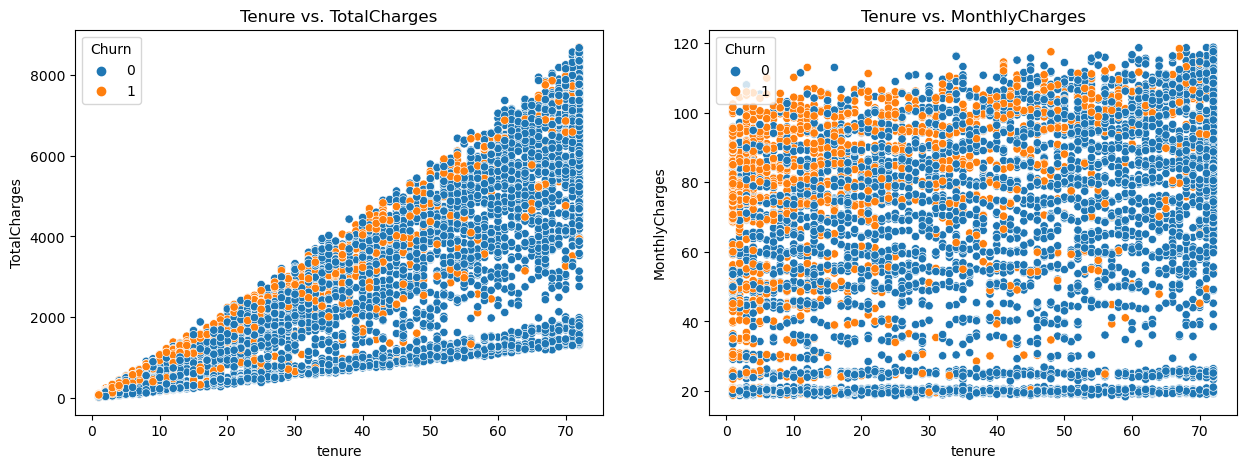

In [21]:
# Explore Total Charges and Monthly Charges
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.scatterplot(x='tenure', y='TotalCharges', data=telco_df, hue='Churn', ax=axes[0])
axes[0].set_title('Tenure vs. TotalCharges')

sns.scatterplot(x='tenure', y='MonthlyCharges', data=telco_df, hue='Churn', ax=axes[1])
axes[1].set_title('Tenure vs. MonthlyCharges')

plt.show()


In [22]:
# Replace 'Yes' with 1 and 'No' with 0 for the specified columns
telco_df[yes_no_cols] = telco_df[yes_no_cols].replace({'Yes': 1, 'No': 0})


In [23]:
telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


What does the customer like or dislike?

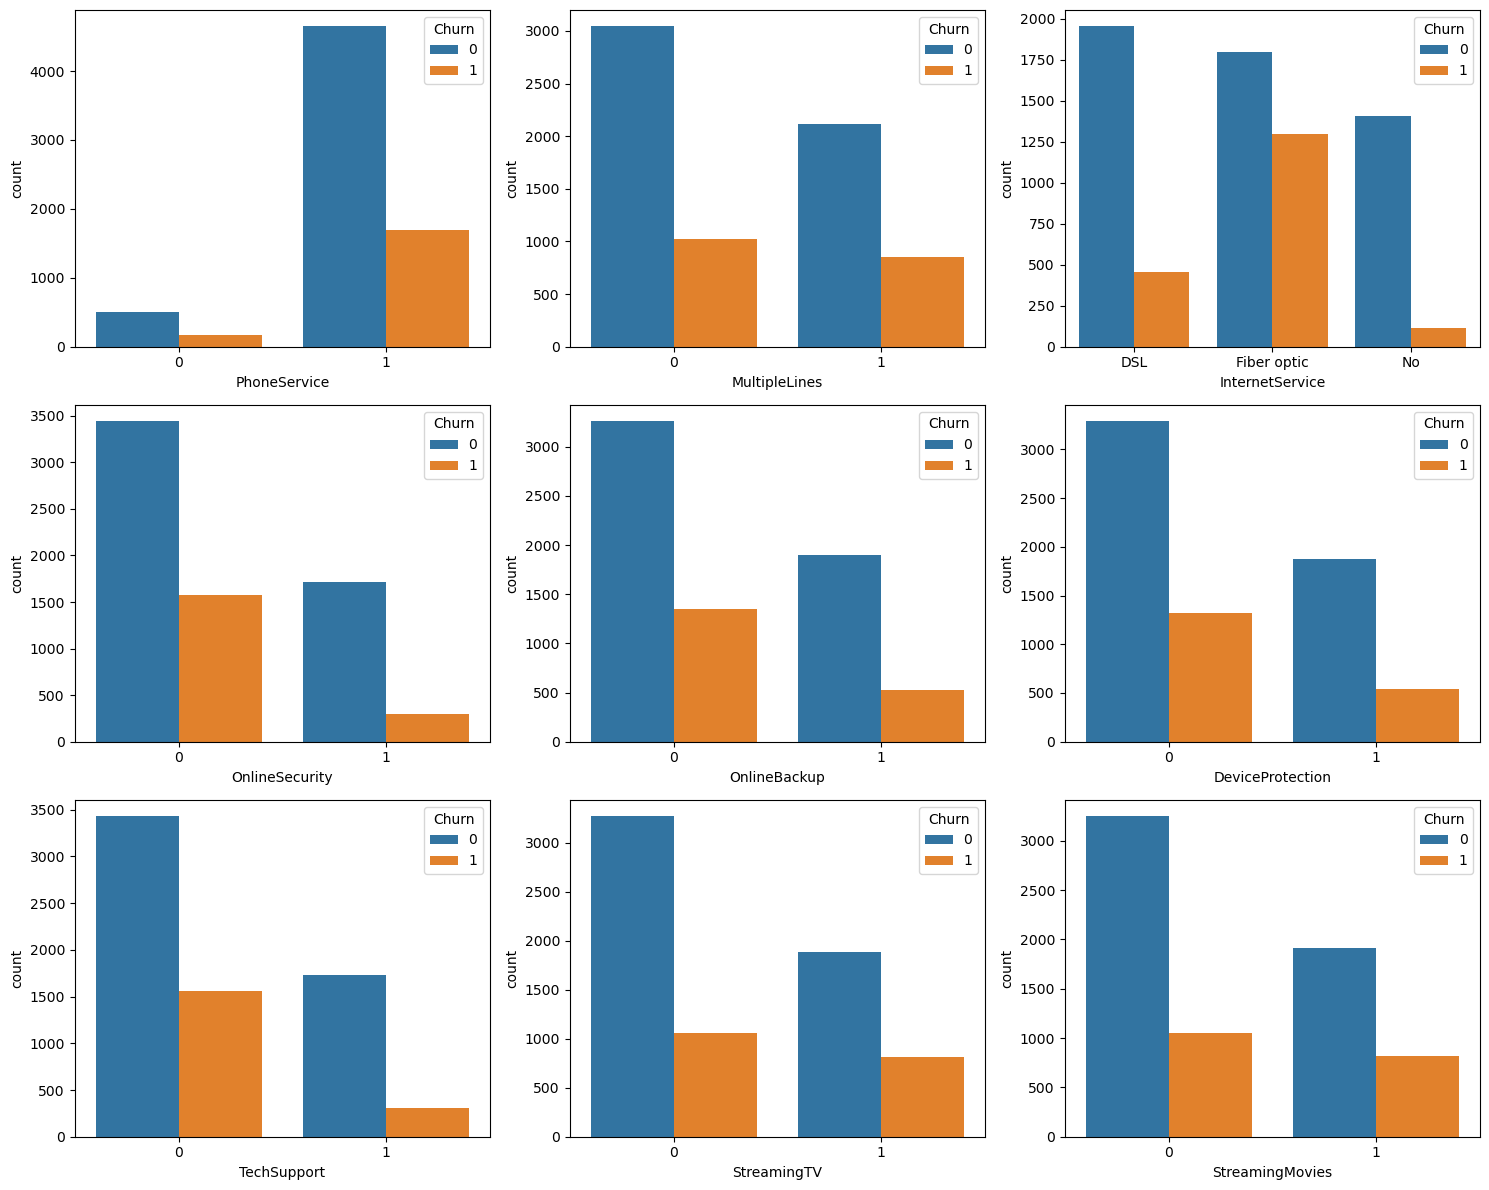

In [24]:
# Customer Preferences for Services
# Columns related to services
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
# Plot countplots for each service
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
for i, column in enumerate(service_cols):
    sns.countplot(x=column, hue='Churn', data=telco_df, ax=axes[i // 3, i % 3])
plt.tight_layout()
plt.show()


Actual reasons for leaving?

To visually represent the actual reasons for leaving (churning) I'll create bar plots or count 
plots for categorical features that might be considered as reasons for churn. 

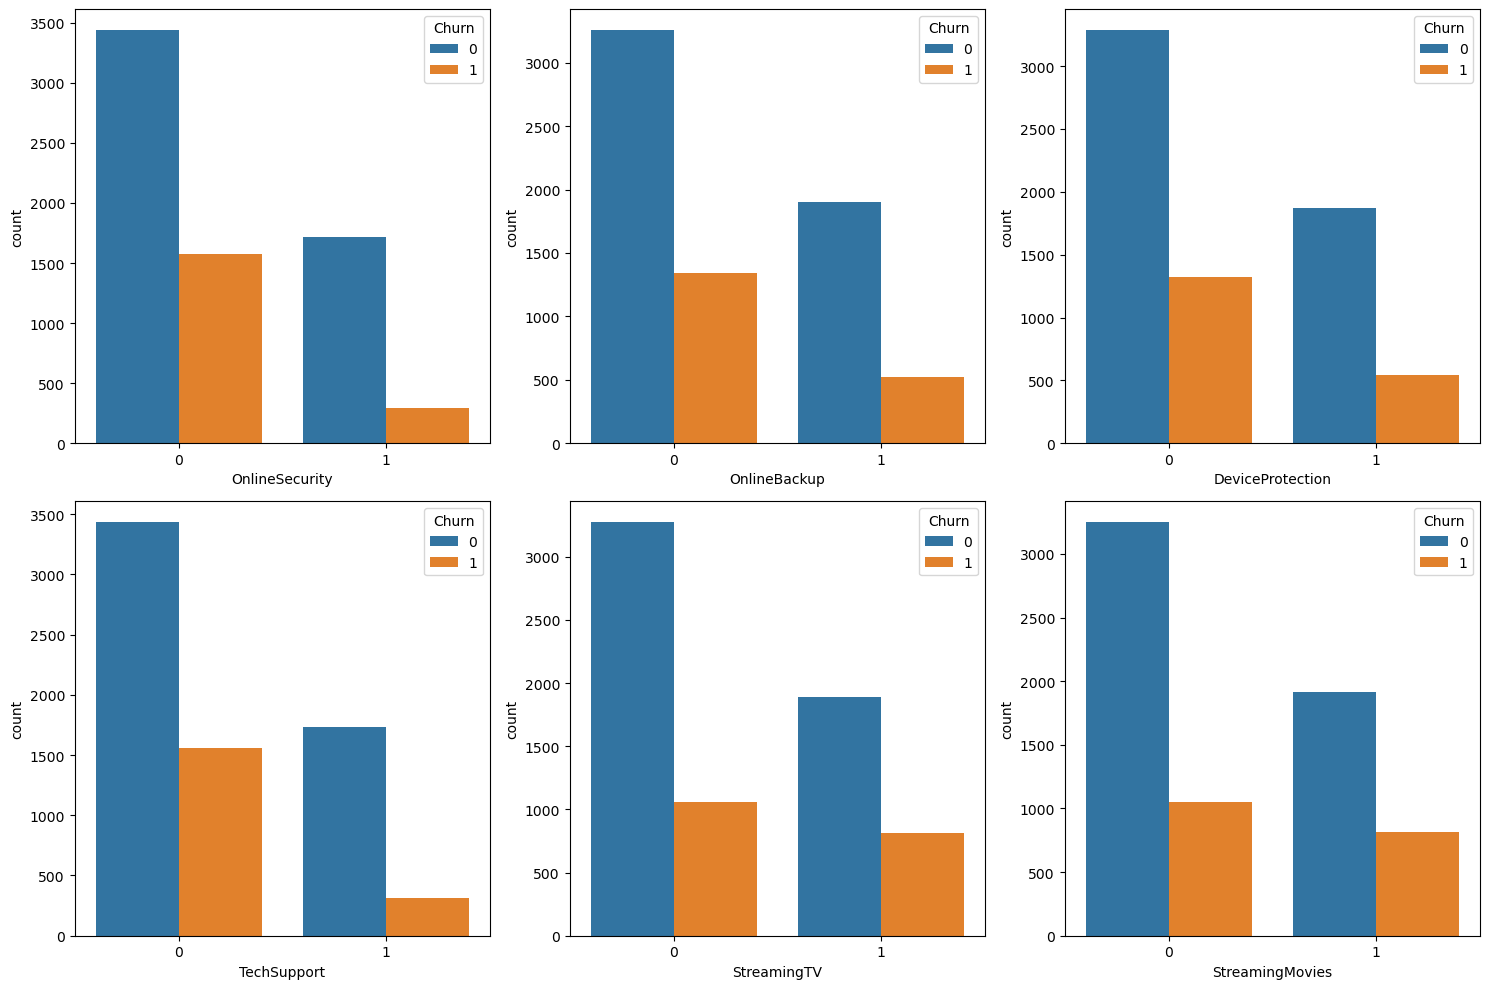

In [25]:
# Making 'Churn' the target variable and exploring reasons for leaving
reason_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
               'StreamingMovies']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Create count plots for each reason column
for i, column in enumerate(reason_cols):
    sns.countplot(x=column, hue='Churn', data=telco_df, ax=axes[i // 3, i % 3])
plt.tight_layout()
plt.show()


What would it take to get customers to stay?

To answer the question using the Telco customer churn dataset, I can explore the relationship between 
various features and the target variable 'Churn.'

C:\Users\Geraldine\AppData\Local\Temp\ipykernel_36832\3840036022.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = telco_df.corr()


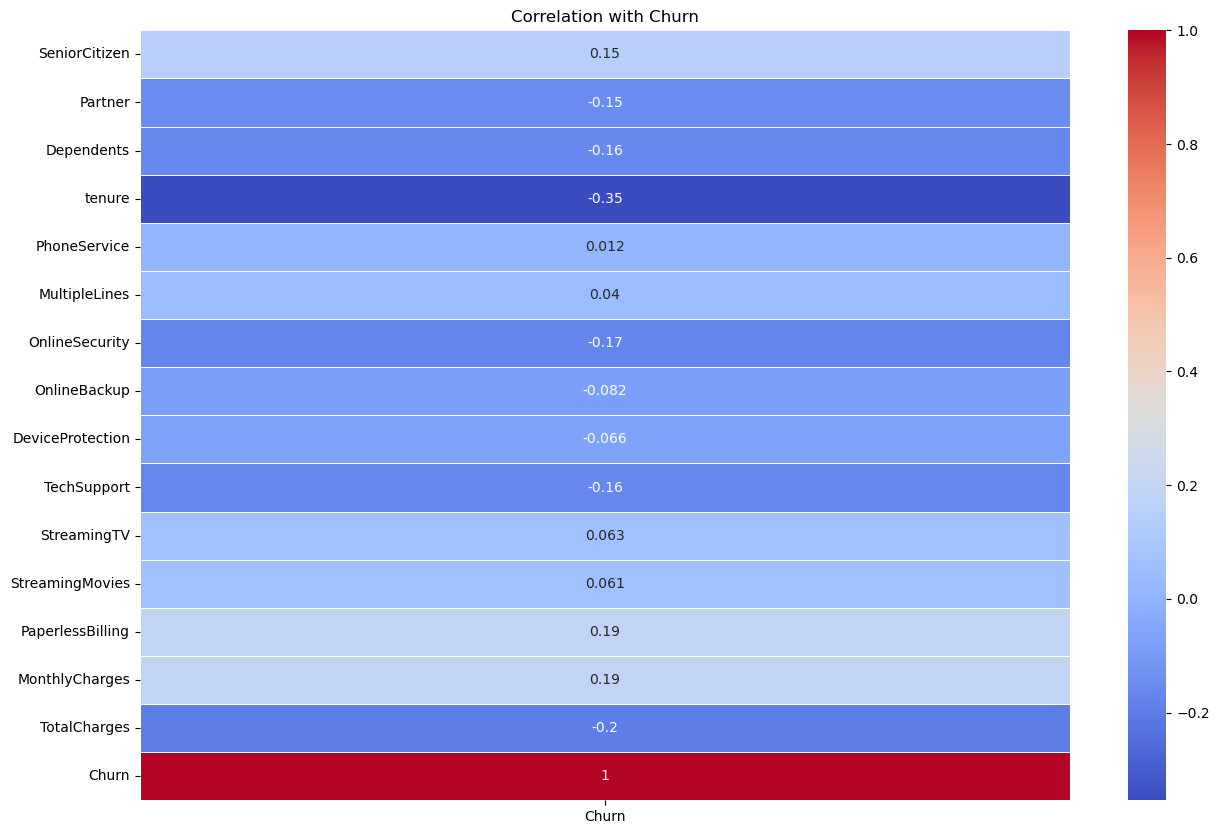

In [26]:
# Correlation matrix with Churn
correlation_matrix = telco_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix[['Churn']], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation with Churn')
plt.show()


CONCLUSION